## Project Overview
The goal of this project is to develop a predective model that can predict the likelihood of developing a heart disease or not based on various factors which include: Do you smoke or not,Does your family have history of having heart disease, Do you have diabetes, What is your C-reactive protein(CRP) level, What is your Homocystine level, what is your Fasting Blood sugar,Sugar consumption,Sleep hours, stress levels, Your alcohol consumption,Either low or high LDL Cholesterol, Blood pressure levels,Age, Exercising Habits and Gender.This model will try to predict the occurence and therefore be considered as a life saving model as globally and mostly here in kenya and U.S, cardiovascular diseases have been shown to be among the top leading causes of death.This will therefore assist different stakeholders to make better health data driven decisions in the future.

# BUSINESS UNDERSTANDING


## The target audience for this project are:
Patients

Government

Insurance companies

Medical practioners and agency boards


## Problem Statement


## Business Objectives
 This project aims to:
 1. Develop a predictive model to estimate the likelihood that one will develop a heart disease or not.
 2. Analyze key factors that affect heart risk through machine learning techniques.
 3. Build models that can assess our decisions.
 4. Provide evaluations to check and review results and determine next steps.
 5. Deployment.


## Metrics of success (benefits)
1. Early Detection and Prevention- will help identidy individuals who are at high risk of heart diseases before symptoms appear. This will also lead to encouaraging early lifestyle changes to prevent disease progression and access the right medication which reduces the long run costs.

2. Personalized Healthcare-Helps doctors and patients make informed decisions based on personal risk factors and make proper judgement on tests and screenings to be done.

3. Cost Savings in Healthcare- By detecting this symptoms early and managing risk factors, you reduce hospital admissions.Lowers the burden on insurance and healthcare systems by minimizing costly late-stage treatments.

4. Research and Development- A predictive model can aid in medical research by identifying new patterns in heart disease risks.Provides insights into key factors contributing to heart disease, leading to better prevention strategies.

5. Data-Driven Public Health Strategies- Helps governments and healthcare organizations design policies to reduce heart disease prevalence and allow government to make better budget allocations to deal with these cases.


## Data Understanding

Homocysteine level- Having high Homocysteine levels may mean you are lacking vitamin B6,B12 or folic acid which without treatement means you are at risk of having blood clots, heart disease and stroke.
CRP Level- A CRP test is a blood test done to check for inflammation in your body. Normally you have low c-reactive protein in your body but your body will release more CRP into your bloodstream if you have inflammation. 

Fasting blood sugar- Also known as the glucose test. Anything less than 100 mg/dL is considered normal

Triglycerides Level- Triglycerides prrovide the body with energy from food. High levels can indicate signs of having diabetes or prediabetes which can increase the risk of heart disease or stroke.Anything less than 150 mg/dL is normal.

Cholesterol levels- Anything less than 200mg/dL is considered normal according to hopkinsmedicine organization

LDL(Bad) cholestrol level- between 100- 129mg/dL is near/above optimal, 130-159mg/dL is near borderline high,160-189mg/dL is high and above 190mg/dL is very high.Cholesterol Levels. Your cholesterol levels show how much cholesterol is circulating in your blood. Your HDL (“good” cholesterol) is the one number you want to be high (ideally above 60). Your LDL (“bad” cholesterol) should be below 100. Your total should be below 200.

BMI - Adults should keep their BMI between 18 and 24.9 as this is considerd normal.Adults with a BMI over 25 are considered overweight and a BMI over 30 is considered obese. Older adults, though, do better if they have a BMI between 25 and 27.

Blood pressure levels- Normal blood pressure is usually considered to be between 90/60 mmHg and 120/80 mmHg.


In [35]:

# importing the libraries used in this model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For NLP
import nltk
from nltk.corpus import RegexpTokenizer, stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
#For Modelling
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score, roc_auc_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [36]:
#Loading the data 
df= pd.read_csv('heart_disease.csv')
df


Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

In [37]:
# Understanding the shape of the data
shape = df.shape
print(f'Heart disease data has', shape[0], 'rows and', shape[1],'columns')

Heart disease data has 10000 rows and 21 columns


In [38]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [39]:
# Check for unique values per column
df.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9978
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Alcohol Consumption        3
Stress Level               3
Sleep Hours             9975
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9974
Homocysteine Level      9980
Heart Disease Status       2
dtype: int64

In [41]:
# check for missing values
df.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [40]:
missing_values_in_percentage = (df.isna().sum()/len(df)*100).sort_values(ascending=False)
print(f"Missing values in percentage for each column : \n{missing_values_in_percentage}")

Missing values in percentage for each column : 
Alcohol Consumption     25.86
Cholesterol Level        0.30
Sugar Consumption        0.30
Diabetes                 0.30
Age                      0.29
High LDL Cholesterol     0.26
CRP Level                0.26
Triglyceride Level       0.26
High Blood Pressure      0.26
Sleep Hours              0.25
Low HDL Cholesterol      0.25
Smoking                  0.25
Exercise Habits          0.25
BMI                      0.22
Stress Level             0.22
Fasting Blood Sugar      0.22
Family Heart Disease     0.21
Homocysteine Level       0.20
Gender                   0.19
Blood Pressure           0.19
Heart Disease Status     0.00
dtype: float64


In [42]:
# Replacing missing values in numerical columns with the mean of each column
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())





In [43]:
categorical_cols = ['Gender','Smoking','Family Heart Disease','Diabetes','High Blood Pressure','Low HDL Cholesterol','High LDL Cholesterol','Alcohol Consumption','Stress Level','Sugar Consumption']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.capitalize().map({
            'Yes': 1, 'No': 0, 'Female': 2, 'Male': 3, 'High': 4, 'Medium': 5, 'Low': 6
        }).fillna(df[col])  # Keeps original values if not in the dictionary


C:\Users\karay\AppData\Local\Temp\ipykernel_22956\4186208128.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).fillna(df[col])  # Keeps original values if not in the dictionary
C:\Users\karay\AppData\Local\Temp\ipykernel_22956\4186208128.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).fillna(df[col])  # Keeps original values if not in the dictionary
C:\Users\karay\AppData\Local\Temp\ipykernel_22956\4186208128.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call

In [44]:
df.isna().sum()

Age                        0
Gender                    19
Blood Pressure             0
Cholesterol Level          0
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                        0
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours                0
Sugar Consumption         30
Triglyceride Level         0
Fasting Blood Sugar        0
CRP Level                  0
Homocysteine Level         0
Heart Disease Status       0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [46]:
df.head(10)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits  Smoking  \
0   56.0     3.0           153.0              155.0            High      1.0   
1   69.0     2.0           146.0              286.0            High      0.0   
2   46.0     3.0           126.0              216.0             Low      0.0   
3   32.0     2.0           122.0              293.0            High      1.0   
4   60.0     3.0           166.0              242.0             Low      1.0   
5   25.0     3.0           152.0              257.0             Low      1.0   
6   78.0     2.0           121.0              175.0            High      1.0   
7   38.0     2.0           161.0              187.0             Low      1.0   
9   75.0     3.0           144.0              252.0             Low      1.0   
10  36.0     2.0           179.0              191.0            High      0.0   

    Family Heart Disease  Diabetes        BMI  High Blood Pressure  ...  \
0                    1.0       0.0  24.991591                  1.0  ...   
1                    1.0       1.0  25.221799                  0.0  ...   
2                    0.0       0.0  29.855447                  0.0  ...   
3                    1.0       0.0  24.130477                  1.0  ...   
4                    1.0       1.0  20.486289                  1.0  ...   
5                    0.0       0.0  28.144681                  0.0  ...   
6                    1.0       1.0  18.042332                  0.0  ...   
7                    1.0       1.0  34.736683                  0.0  ...   
9                    1.0       0.0  30.142149                  0.0  ...   
10                   1.0       0.0  34.447618                  0.0  ...   

    High LDL Cholesterol  Alcohol Consumption  Stress Level  Sleep Hours  \
0                    0.0                  4.0           5.0     7.633228   
1                    0.0                  5.0           4.0     8.744034   
2                    1.0                  6.0           6.0     4.440440   
3                    1.0                  6.0           4.0     5.249405   
4                    0.0                  6.0           4.0     7.030971   
5                    0.0                  6.0           5.0     5.504876   
6                    0.0                  5.0           5.0     9.240911   
7                    0.0                  6.0           5.0     7.841008   
9                    1.0                  6.0           5.0     4.002662   
10                   0.0                  5.0           4.0     9.151889   

    Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                 5.0               342.0           120.142213  12.969246   
1                 5.0               133.0           157.000000   9.355389   
2                 6.0               393.0            92.000000  12.709873   
3                 4.0               293.0            94.000000  12.509046   
4                 4.0               263.0           154.000000  10.381259   
5                 6.0               126.0            91.000000   4.297575   
6                 5.0               107.0            85.000000  11.582983   
7                 4.0               228.0           111.000000   4.929381   
9                 4.0               199.0            96.000000  10.005698   
10                4.0               231.0           120.142213  13.583347   

    Homocysteine Level  Heart Disease Status  
0            12.387250                    No  
1            19.298875                    No  
2            11.230926                    No  
3             5.961958                    No  
4             8.153887                    No  
5            10.815983                    No  
6            19.659461                    No  
7            17.146599                    No  
9             7.604357                    No  
10           13.783722                    No  

[10 rows x 21 columns]

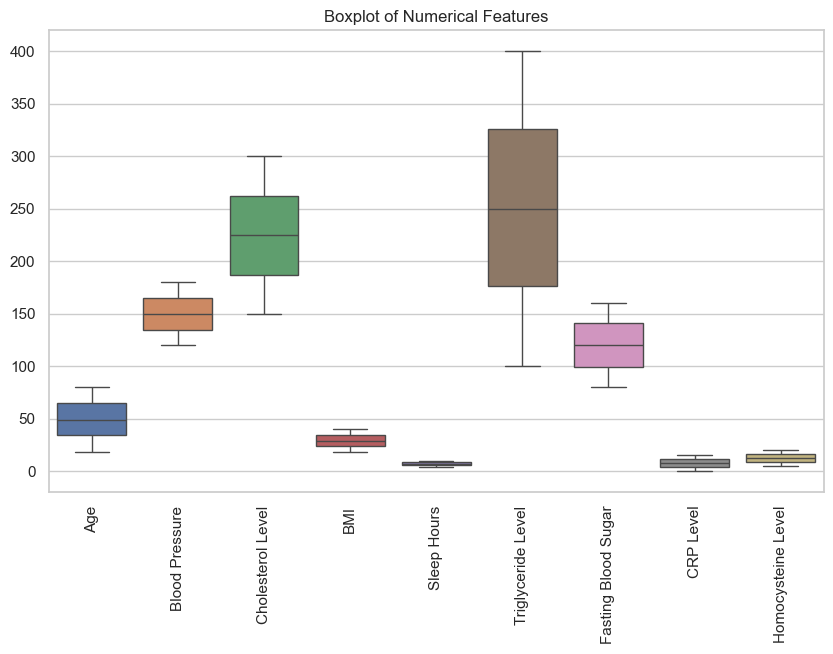

In [47]:
# Boxplots for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

### 0bservation
There are no outliers

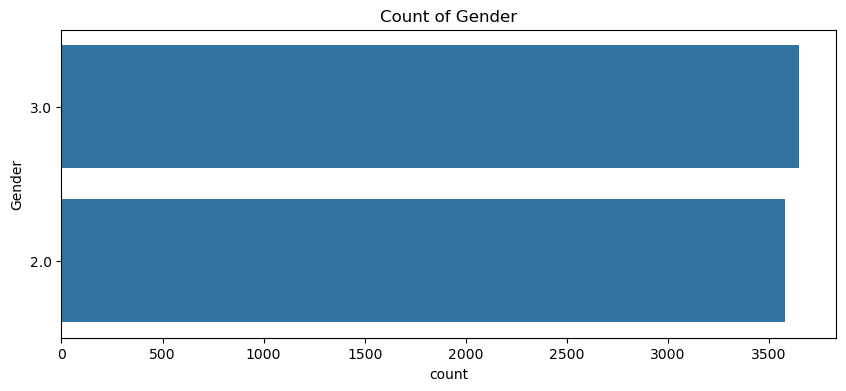

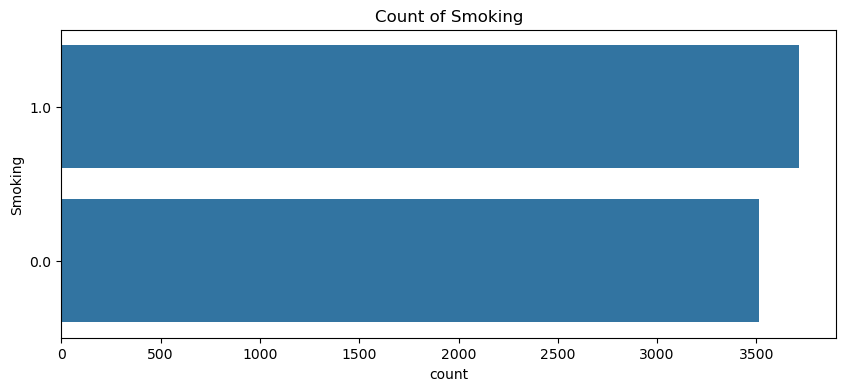

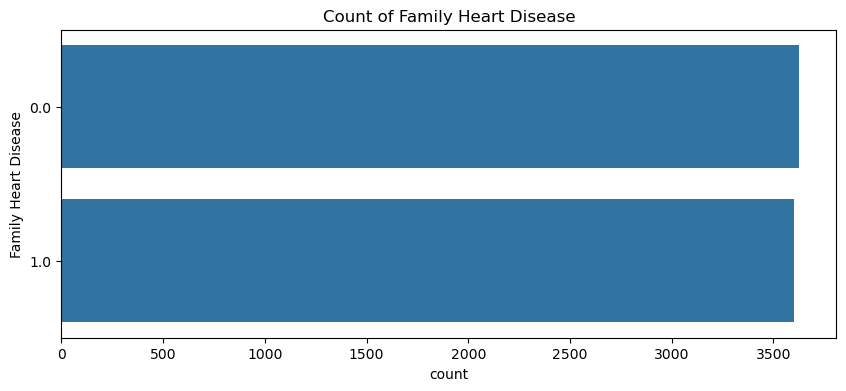

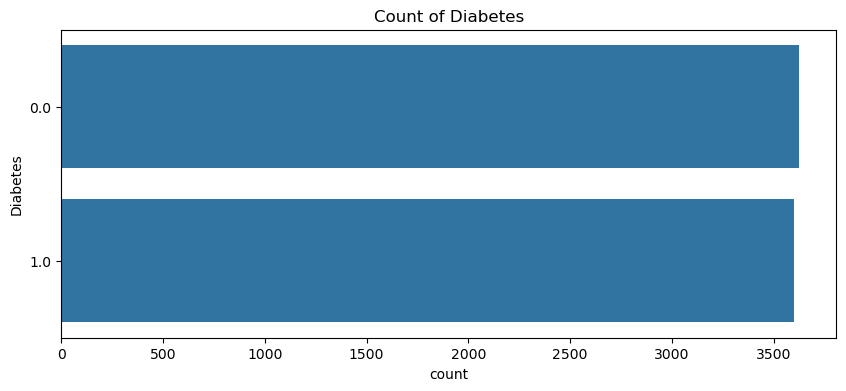

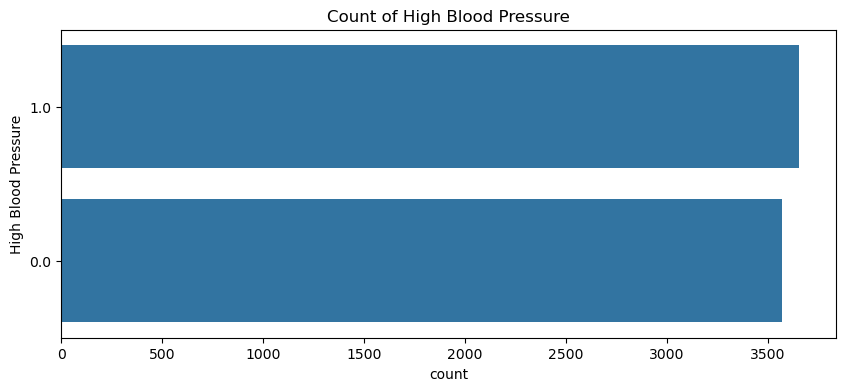

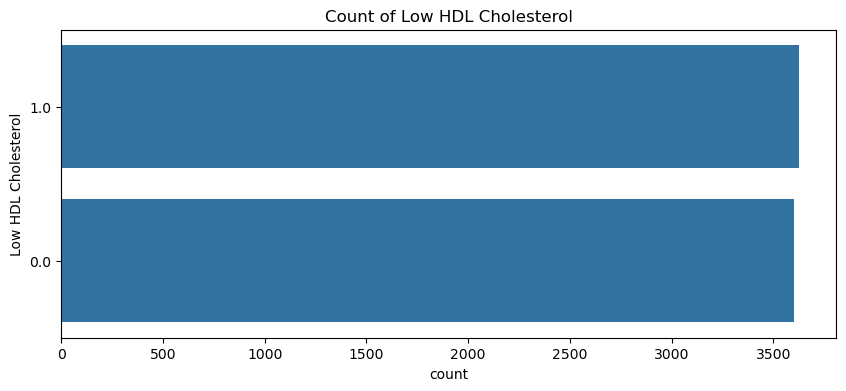

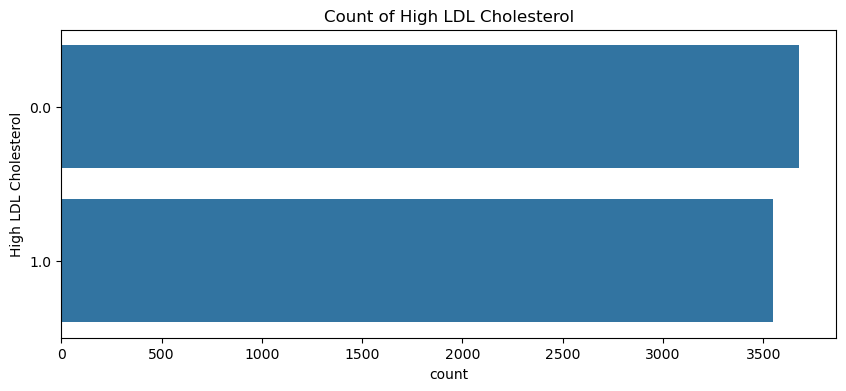

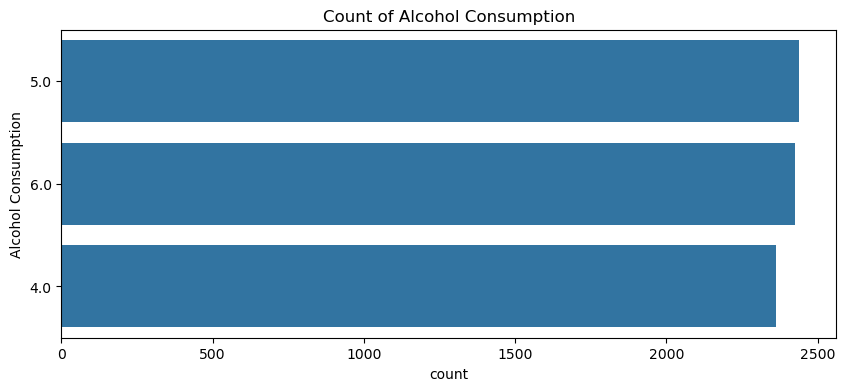

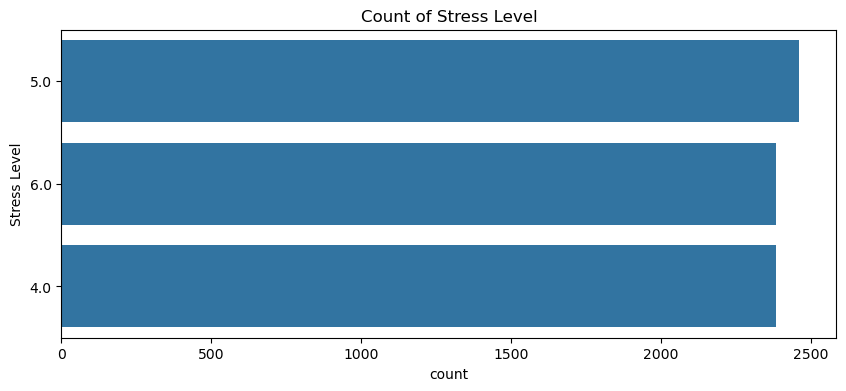

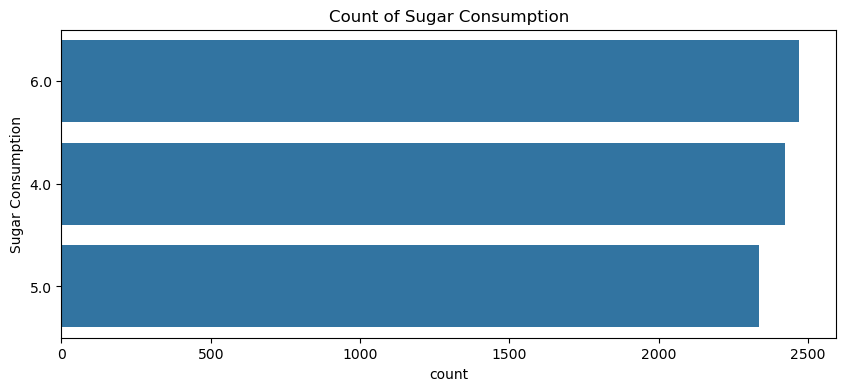

In [16]:
# Plot counts of our categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

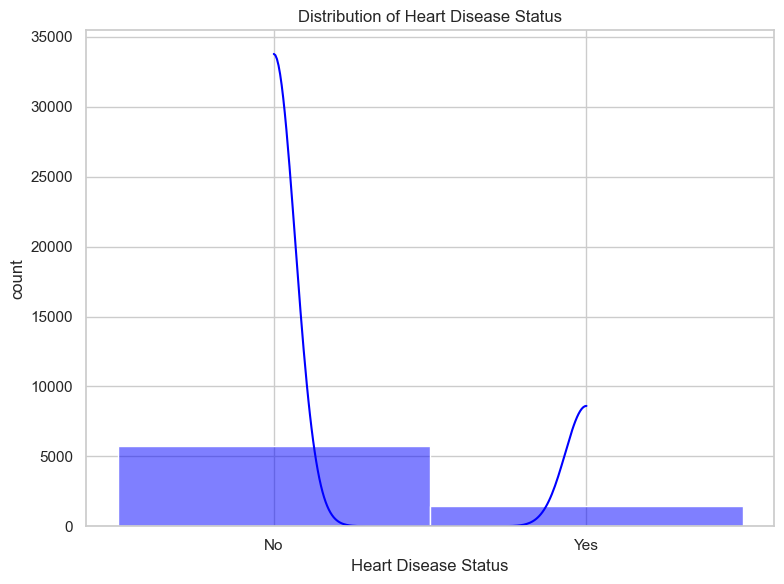

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.histplot(df['Heart Disease Status'], bins=30,color='blue',kde= True)
plt.xlabel("Heart Disease Status")
plt.ylabel("count")
plt.title("Distribution of Heart Disease Status")
plt.tight_layout()
plt.show()

### Bivariate EDA

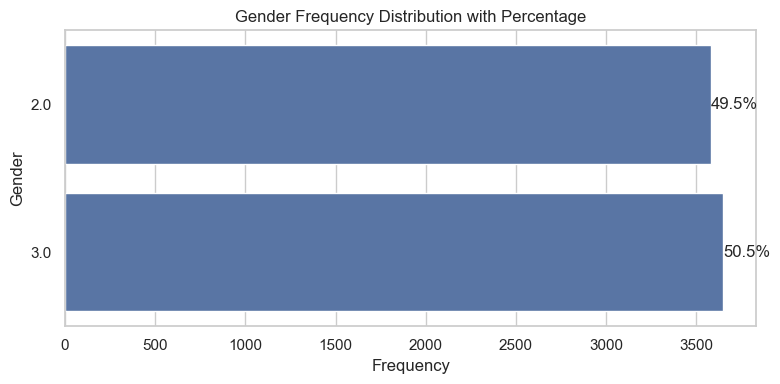

In [48]:

# Calculate counts and percentages
gender_counts = df["Gender"].value_counts().sort_index().reset_index()
gender_counts.columns = ['Gender', 'Frequency']
gender_counts["Percentage"] = (gender_counts["Frequency"] / gender_counts["Frequency"].sum()) * 100

# Ensure Gender column is a string type
gender_counts["Gender"] = gender_counts["Gender"].astype(str)

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=gender_counts, x='Frequency', y='Gender', orient='h')

# Add percentage labels on bars
for index, value in enumerate(gender_counts["Frequency"]):
    percentage = gender_counts["Percentage"][index]
    ax.text(value + 1, index, f'{percentage:.1f}%', va='center')  # Adjust text position

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Gender")
plt.title("Gender Frequency Distribution with Percentage")
plt.tight_layout()
plt.show()


Women have a 50.5% likely hood of getting Heart Disease as compared to the men

C:\Users\karay\AppData\Local\Temp\ipykernel_22956\3706598807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Age',y='Gender',palette='Set2')


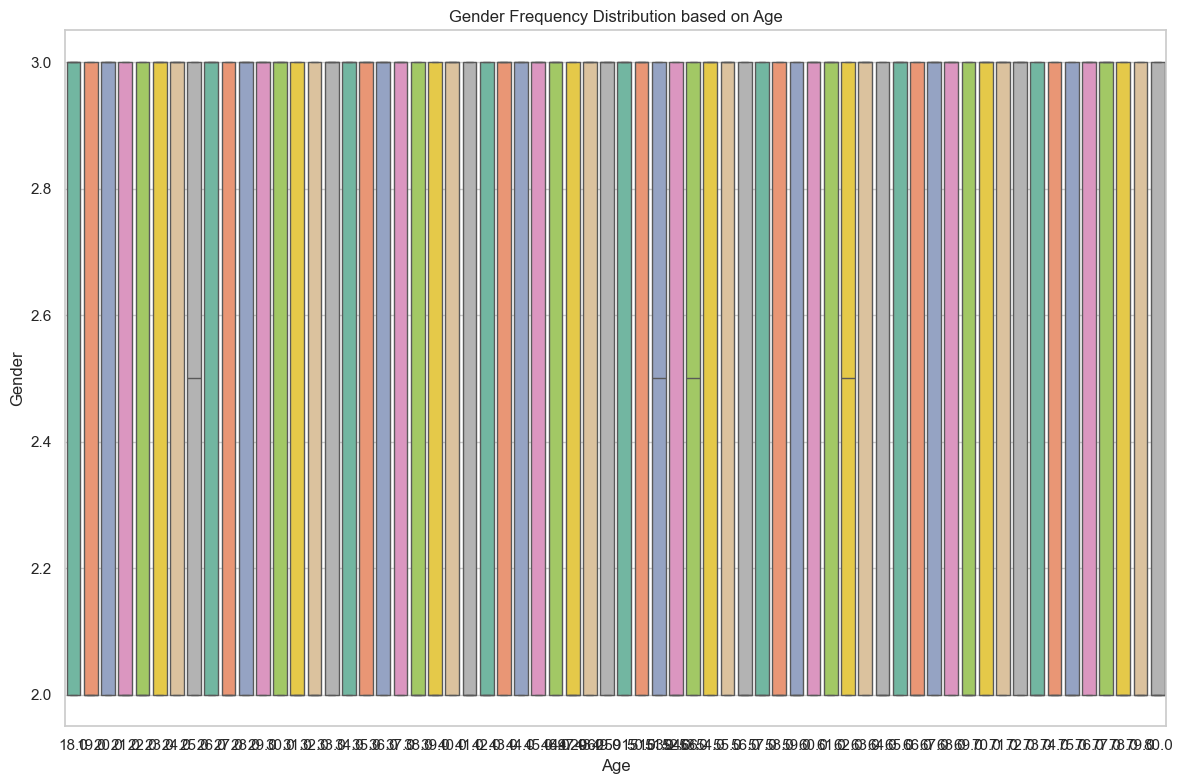

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, x='Age',y='Gender',palette='Set2')
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Gender Frequency Distribution based on Age")
plt.tight_layout()
plt.show()

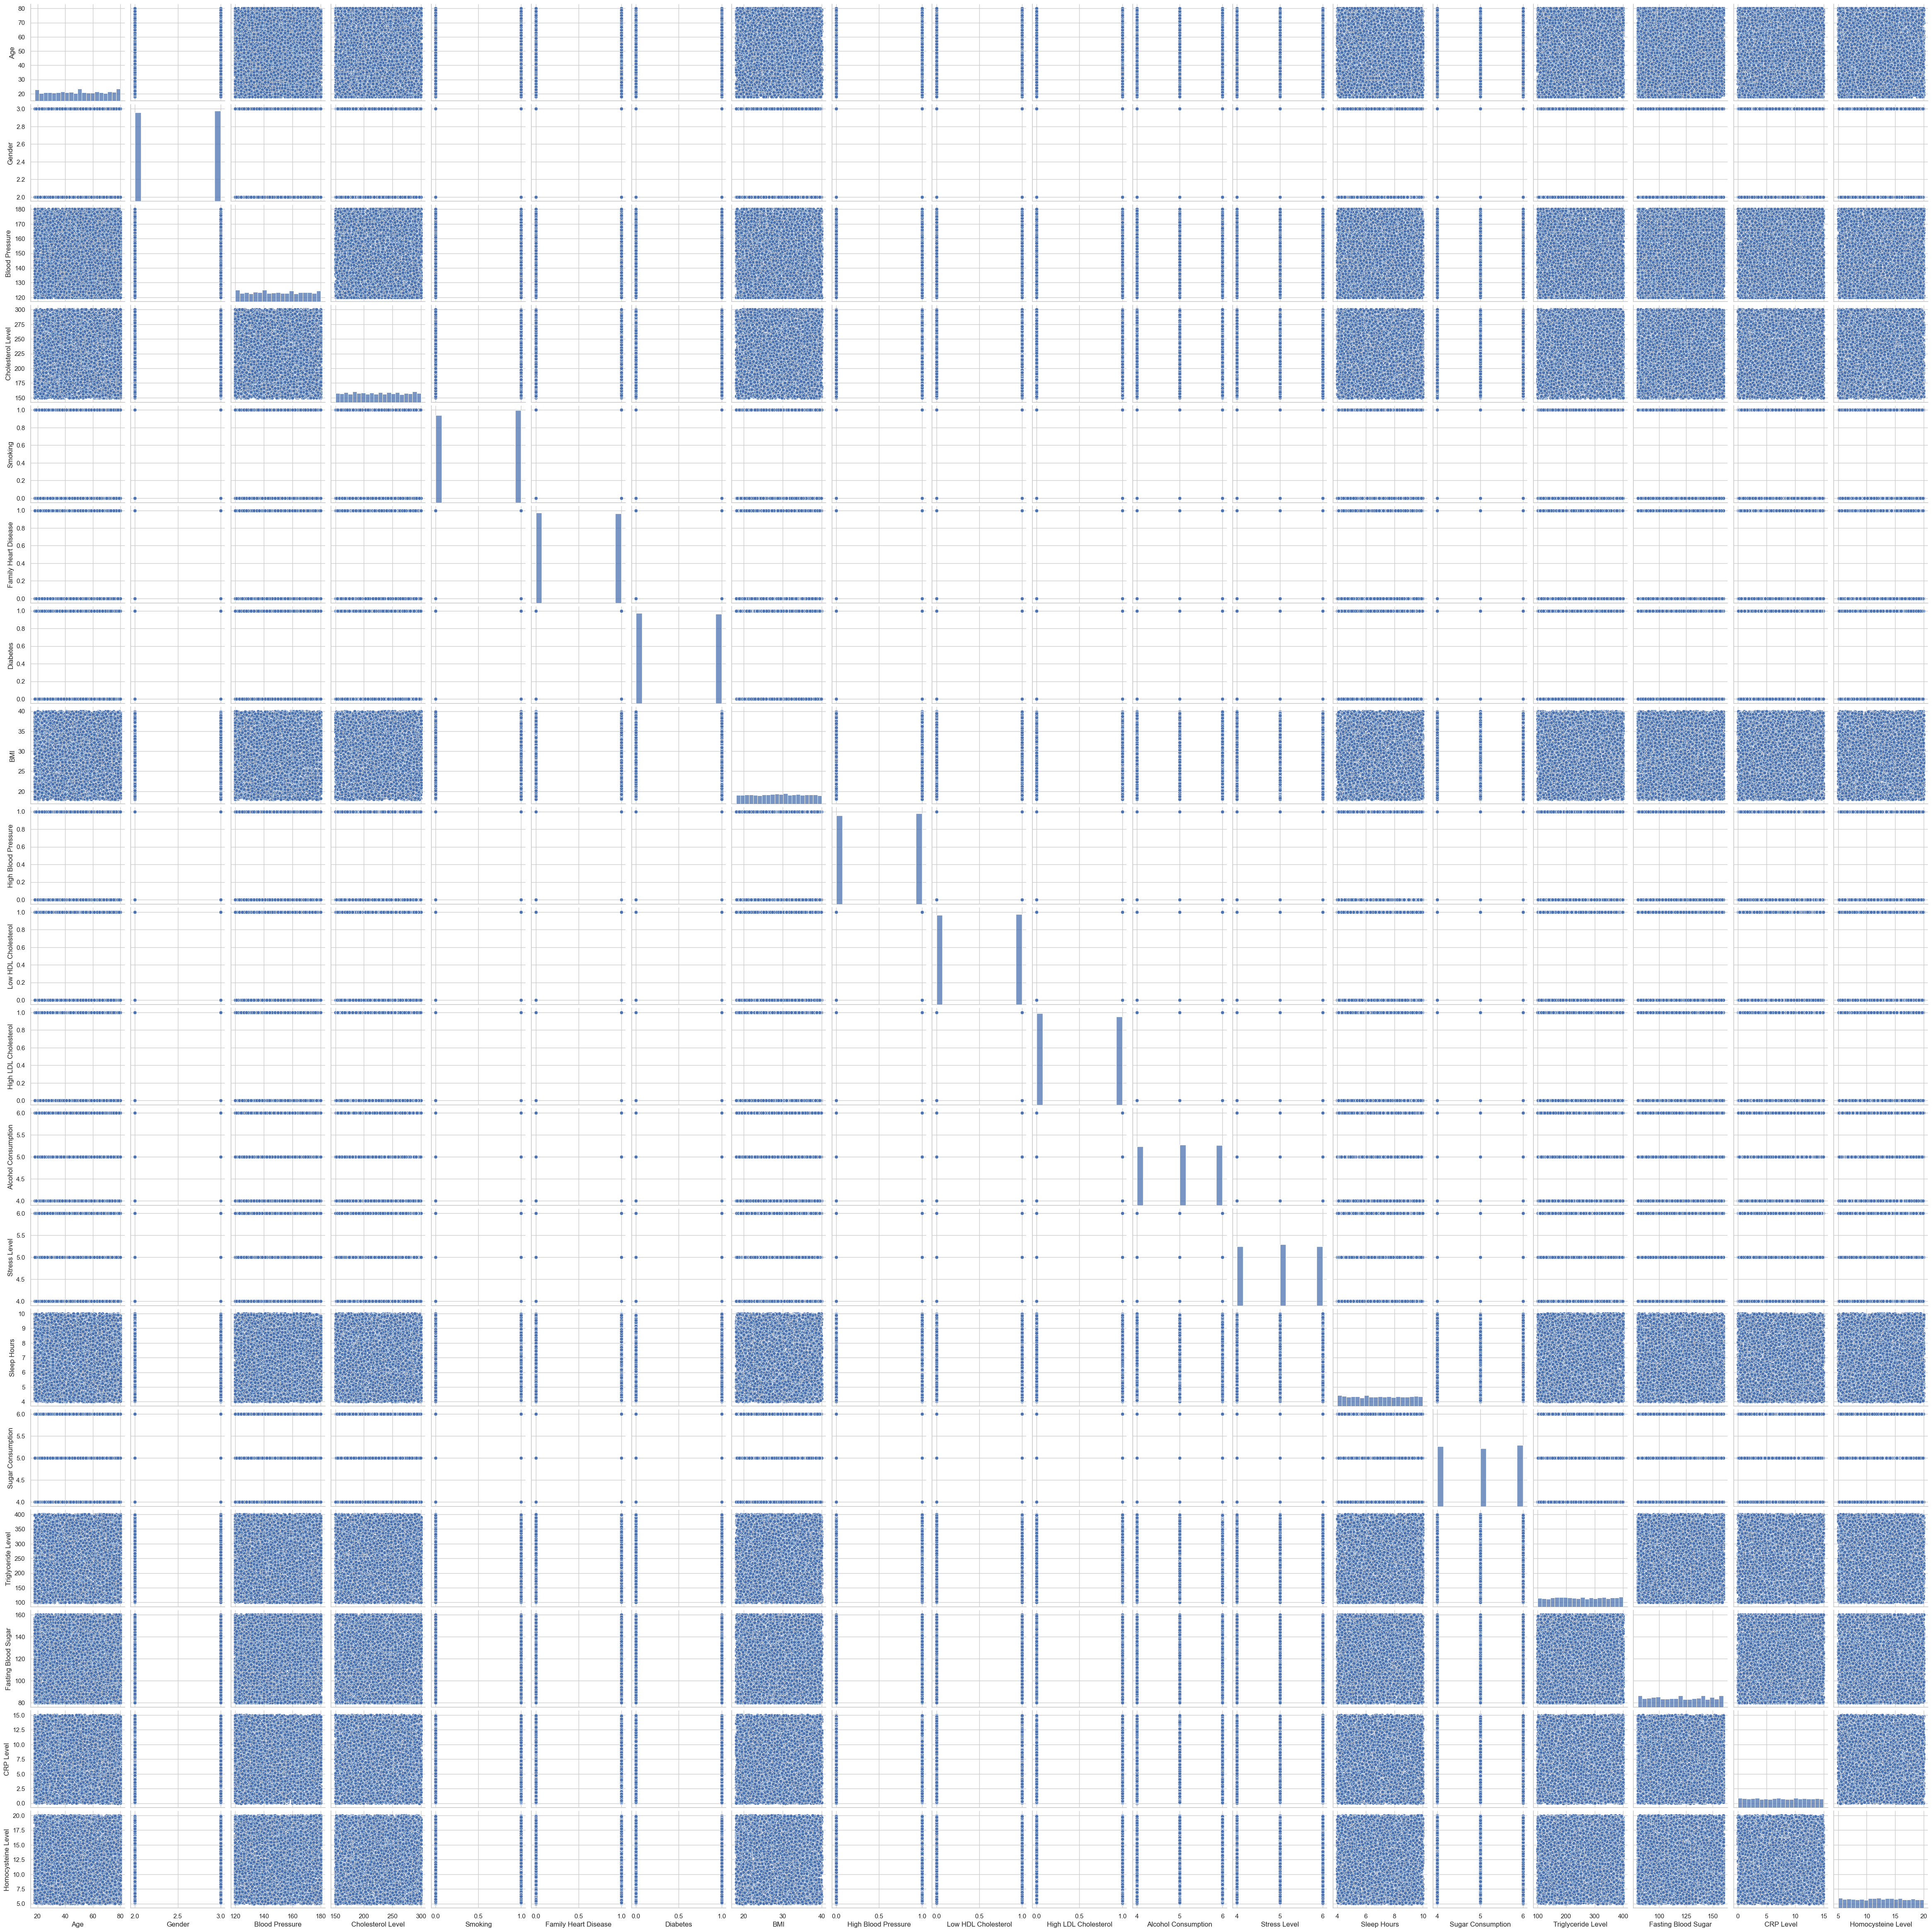

In [50]:
sns.pairplot(data=df);

In [51]:
type(numeric_cols)
numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols = df.select_dtypes(include=['number'])


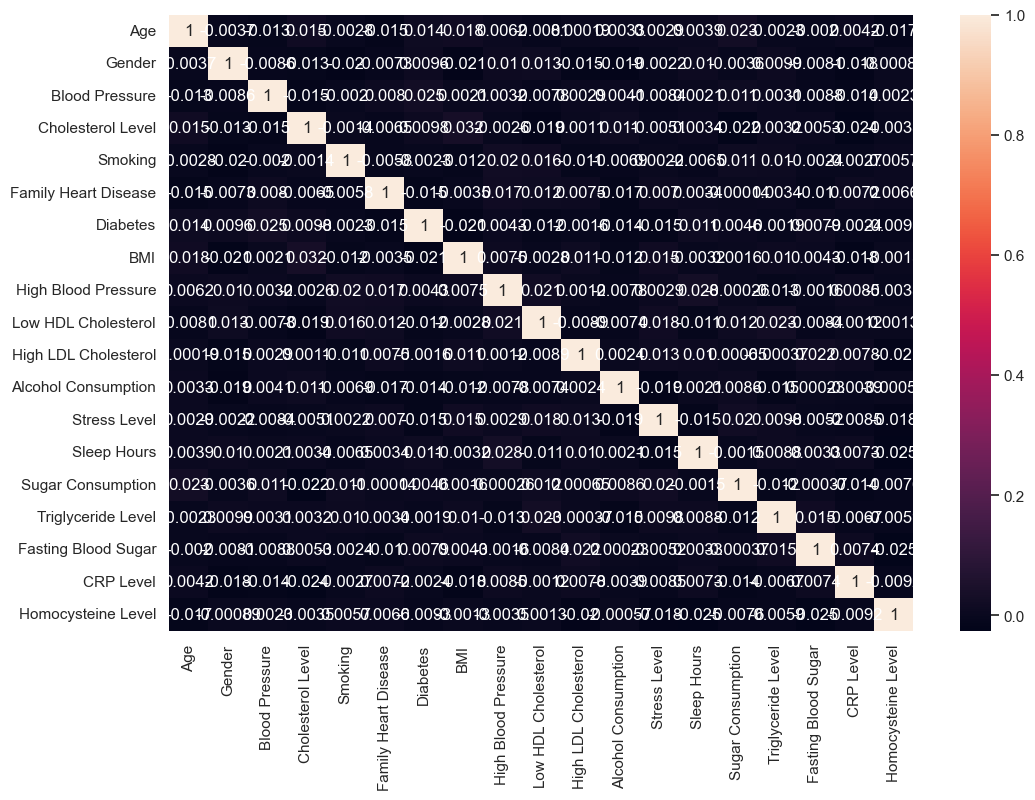

In [52]:
corr = numeric_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True);

### Hypothesis testing

#### Chi-square test for Heart Disease Status and Heart Disease Factors

In [53]:
df.columns


Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [54]:
heart_disease_factors = df.groupby(['Blood Pressure','Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level',]).size().reset_index(name='count')

In [55]:
import scipy.stats as stats
hypothesis_table = pd.crosstab(df['Heart Disease Status'],df['Blood Pressure'])
chic2_stat, p_value, dof, expected= stats.chi2_contingency(hypothesis_table)
print(f"Chi2_stat: {chic2_stat}")
print(f"P_value:{p_value}")
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Heart disease likely to happen")
else:
    print("Fail to reject null hypothesis: Heart Disease not likely to occur.")

Chi2_stat: 55.89702876747986
P_value:0.6608256131441691
Fail to reject null hypothesis: Heart Disease not likely to occur.


In [56]:
import scipy.stats as stats
hypothesis_table = pd.crosstab(df['Heart Disease Status'],df['Family Heart Disease'])
chic2_stat, p_value, dof, expected= stats.chi2_contingency(hypothesis_table)
print(f"Chi2_stat: {chic2_stat}")
print(f"P_value:{p_value}")
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Heart disease likely to happen")
else:
    print("Fail to reject null hypothesis: Heart Disease not likely to occur.")

Chi2_stat: 0.04830133731680675
P_value:0.8260458827373715
Fail to reject null hypothesis: Heart Disease not likely to occur.


In [57]:
import scipy.stats as stats
hypothesis_table = pd.crosstab(df['Heart Disease Status'],df['CRP Level'])
chic2_stat, p_value, dof, expected= stats.chi2_contingency(hypothesis_table)
print(f"Chi2_stat: {chic2_stat}")
print(f"P_value:{p_value}")
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: Heart disease likely to happen")
else:
    print("Fail to reject null hypothesis: Heart Disease not likely to occur.")

Chi2_stat: 7210.098906044783
P_value:0.5041008806602814
Fail to reject null hypothesis: Heart Disease not likely to occur.


In [58]:
# Define target variable
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

In [59]:
X = pd.get_dummies(X, drop_first=True)

In [60]:
#Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
print (X_train,X_test)

[[-0.0140144   0.99251811  1.32498005 ... -1.66653176 -0.69811201
   1.42475967]
 [ 1.67717861  0.99251811 -1.18920535 ...  0.20083907 -0.69811201
   1.42475967]
 [-0.34134208 -1.00753829 -0.90350246 ... -1.71345822 -0.69811201
  -0.70187276]
 ...
 [-0.50500592  0.99251811 -0.78922131 ... -0.5667132  -0.69811201
   1.42475967]
 [-0.06856902 -1.00753829  0.81071486 ...  1.74453107 -0.69811201
  -0.70187276]
 [ 0.91341402  0.99251811  0.29644966 ... -0.6502704  -0.69811201
  -0.70187276]] [[-1.43243435  0.99251811  1.55354236 ... -0.6461913  -0.69811201
   1.42475967]
 [ 0.04054021 -1.00753829  0.06788735 ... -1.11601613 -0.69811201
   1.42475967]
 [ 0.96796864  0.99251811  1.26783947 ...  1.13854512 -0.69811201
   1.42475967]
 ...
 [ 1.29529632 -1.00753829 -0.560659   ... -0.29065211 -0.69811201
   1.42475967]
 [ 1.40440554  0.99251811 -0.96064304 ... -1.24291641 -0.69811201
   1.42475967]
 [-0.55956054 -1.00753829 -1.58918939 ... -0.09539243 -0.69811201
   1.42475967]]


In [63]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print ( y_test.shape)

(5060, 21)
(2169, 21)
(5060,)
(2169,)


## perform balancing using SMOTE- to solve class imbalance because it makes our model biased

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train,y_train)
y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1733
         Yes       0.00      0.00      0.00       436

    accuracy                           0.80      2169
   macro avg       0.40      0.50      0.44      2169
weighted avg       0.64      0.80      0.71      2169



c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


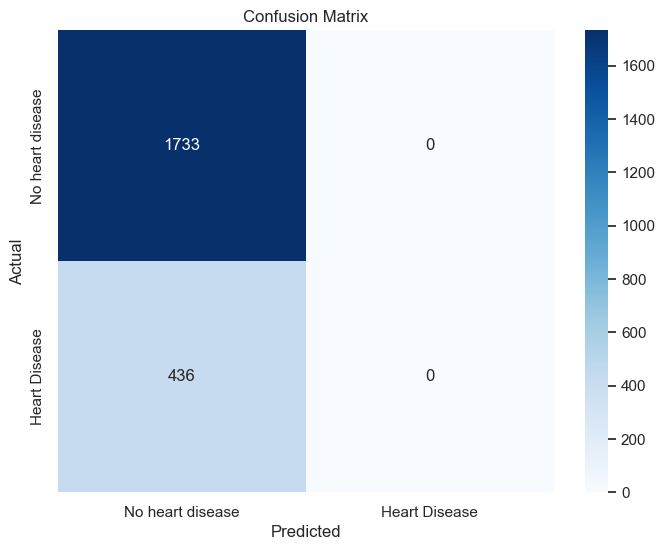

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function after defining it
plot_confusion_matrix(y_test, y_pred, labels=['No heart disease', 'Heart Disease'])


C:\Users\karay\AppData\Local\Temp\ipykernel_22956\3187227409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


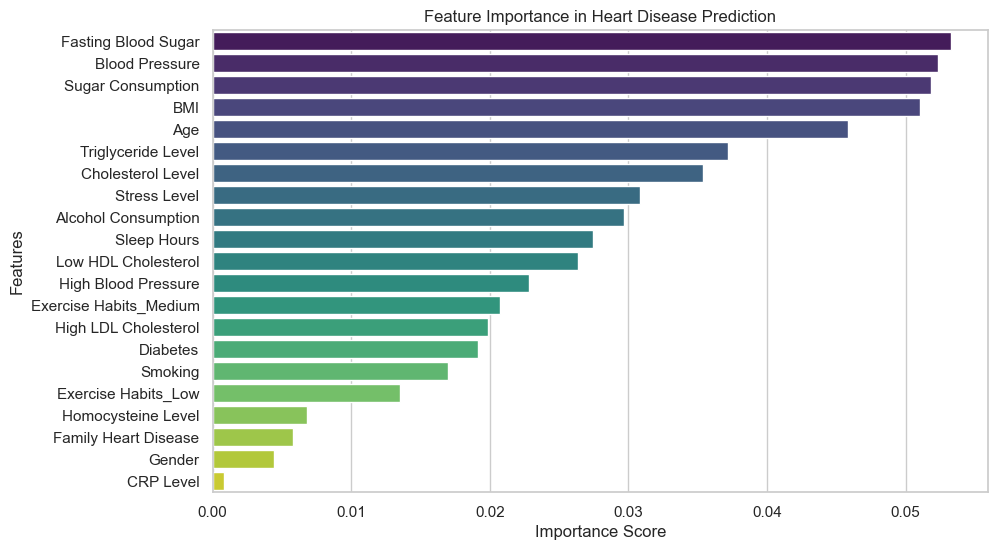

Fasting Blood Sugar       0.053271
Blood Pressure            0.052372
Sugar Consumption         0.051859
BMI                       0.051042
Age                       0.045847
Triglyceride Level        0.037221
Cholesterol Level         0.035367
Stress Level              0.030803
Alcohol Consumption       0.029701
Sleep Hours               0.027415
Low HDL Cholesterol       0.026364
High Blood Pressure       0.022860
Exercise Habits_Medium    0.020741
High LDL Cholesterol      0.019861
Diabetes                  0.019169
Smoking                   0.016982
Exercise Habits_Low       0.013518
Homocysteine Level        0.006836
Family Heart Disease      0.005795
Gender                    0.004419
CRP Level                 0.000780
dtype: float64

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use coef_ for feature importance in Logistic Regression
feature_importances = pd.Series(abs(logreg_model.coef_[0]), index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Heart Disease Prediction')
plt.show()

feature_importances


Based on the model, Fasting Blood sugar is the strongest predictor whether individuals are at risk fo getting Heart Disease. However, there are other key factors such as Blood Pressure,Sugar consumption,BMI and age that have significant contribution to our analysis.


### perform hyperparameter tuning to try improve my model


In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1733
         Yes       0.00      0.00      0.00       436

    accuracy                           0.80      2169
   macro avg       0.40      0.50      0.44      2169
weighted avg       0.64      0.80      0.71      2169



c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\karay\AppData\Local\Temp\ipykernel_22956\2358610482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances,y=feature_importances.index,palette='viridis')


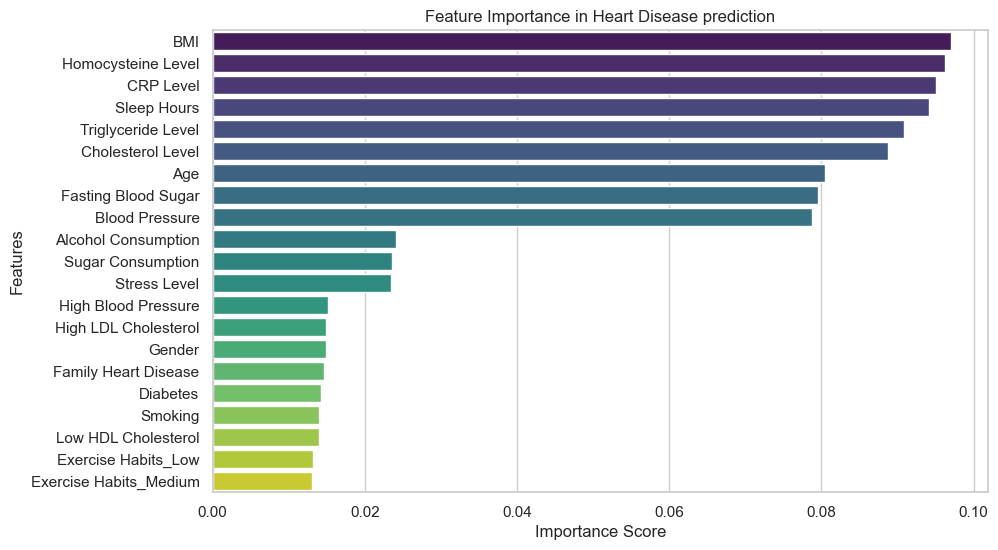

BMI                       0.097012
Homocysteine Level        0.096296
CRP Level                 0.095082
Sleep Hours               0.094128
Triglyceride Level        0.090834
Cholesterol Level         0.088717
Age                       0.080528
Fasting Blood Sugar       0.079534
Blood Pressure            0.078825
Alcohol Consumption       0.024130
Sugar Consumption         0.023606
Stress Level              0.023363
High Blood Pressure       0.015130
High LDL Cholesterol      0.014866
Gender                    0.014832
Family Heart Disease      0.014664
Diabetes                  0.014244
Smoking                   0.013977
Low HDL Cholesterol       0.013927
Exercise Habits_Low       0.013220
Exercise Habits_Medium    0.013082
dtype: float64

In [67]:
feature_importances =  pd.Series(rf_model.feature_importances_,
                                 index=X.columns).sort_values(ascending= False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances,y=feature_importances.index,palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Heart Disease prediction')
plt.show()
feature_importances

BMI is the strongest predictor sugessting that individuals with High BMI are more likely to have Heart disease.
Homocysteine levels,CRP Level, sleep hours, Triglyceride and Cholestrol Levels also significantly contribute to individuals being at risk of getting Heart Diseases

In [ ]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 563.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 804.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.1/150.0 MB 326.8 kB/s eta 0:07:39
   ---------------------------------------- 0.1/150.0 MB 566.5 kB/s eta 0:04:25
   ---------------------------------------- 0.2/150.0 MB 846.9 kB/s eta 0:02:57
   ---------------------------------------- 0.4/150.0 MB 1.2 MB/s eta 0:02:07
   ---------------------------------------- 0.5/150.0 MB 1.5 MB/s eta 0:01:44
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:00:59
   ---------------------------------------- 1.4/150.0 MB 3.2 MB/s eta 0:00:47
    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.80      0.94      0.86      1733
         Yes       0.22      0.07      0.10       436

    accuracy                           0.76      2169
   macro avg       0.51      0.50      0.48      2169
weighted avg       0.68      0.76      0.71      2169



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost model with numeric labels
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predict using the trained model
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels if needed
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate performance
print(classification_report(y_test, y_pred_xgb_labels))


              precision    recall  f1-score   support

          No       0.80      0.96      0.87      1733
         Yes       0.16      0.03      0.05       436

    accuracy                           0.77      2169
   macro avg       0.48      0.50      0.46      2169
weighted avg       0.67      0.77      0.71      2169

